In [1]:
%matplotlib inline
import pandas as pd
import ast
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from IPython.display import display
from pandas.plotting import scatter_matrix
from datetime import datetime

stopWords = set(stopwords.words('english'))
ted = pd.read_csv("./data/ted_main.csv")
transcript = pd.read_csv('./data/transcripts.csv')

In [2]:
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [3]:
ted.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [4]:
#Checking data types
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
comments              2550 non-null int64
description           2550 non-null object
duration              2550 non-null int64
event                 2550 non-null object
film_date             2550 non-null int64
languages             2550 non-null int64
main_speaker          2550 non-null object
name                  2550 non-null object
num_speaker           2550 non-null int64
published_date        2550 non-null int64
ratings               2550 non-null object
related_talks         2550 non-null object
speaker_occupation    2544 non-null object
tags                  2550 non-null object
title                 2550 non-null object
url                   2550 non-null object
views                 2550 non-null int64
dtypes: int64(7), object(10)
memory usage: 338.8+ KB


In [5]:
ted["views"].mean()

1698297.4815686275

In [6]:
#Correlation matrix
ted.corr()

,comments,duration,film_date,languages,num_speaker,published_date,views
comments,1.000000,0.140694,-0.133303,0.318284,-0.035489,-0.185936,0.530939
duration,0.140694,1.000000,-0.242941,-0.295681,0.022257,-0.166324,0.048740
film_date,-0.133303,-0.242941,1.000000,-0.061957,0.040227,0.902565,0.006447
languages,0.318284,-0.295681,-0.061957,1.000000,-0.063100,-0.171836,0.377623
num_speaker,-0.035489,0.022257,0.040227,-0.063100,1.000000,0.049240,-0.026389
published_date,-0.185936,-0.166324,0.902565,-0.171836,0.049240,1.000000,-0.017920
views,0.530939,0.048740,0.006447,0.377623,-0.026389,-0.017920,1.000000


393.0999999999999

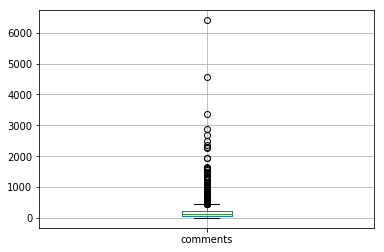

In [7]:
#Boxplot for comments distribution
ted.boxplot(column = "comments")
ted["comments"].quantile(0.9)

(255, 17)

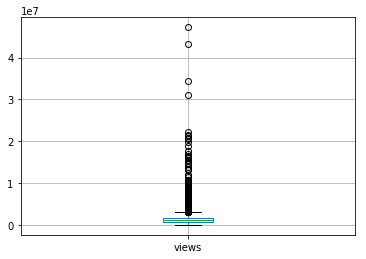

In [8]:
#Boxplot for views distribution
ted.boxplot(column = "views")
ted["views"].quantile(0.9)
ted[ted["views"] > 3051912].shape

640    Douglas Adams
Name: main_speaker, dtype: object

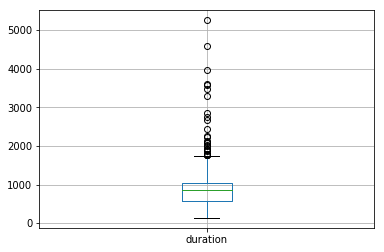

In [9]:
ted.boxplot(column = "duration")
# ted["duration"].quantile(0.9)
# ted["duration"].max()
ted[ted["duration"] == 5256].title
ted[ted["duration"] == 5256].main_speaker

In [10]:
# Total count for each rating. Most talks pick up the inspiring rating.

import operator
ratings = {}
for index, rating_str in ted["ratings"].iteritems():
    ratings_list = ast.literal_eval(rating_str)
    for rating in ratings_list:
        ratings[rating["name"]] = ratings.get(rating["name"], 0) + rating["count"]
for i in sorted(ratings.items(), key=operator.itemgetter(1)):
    print(i)

('Confusing', 53436)
('Obnoxious', 66303)
('Longwinded', 83344)
('Unconvincing', 134558)
('OK', 207157)
('Jaw-dropping', 377547)
('Ingenious', 384386)
('Funny', 393895)
('Courageous', 420045)
('Beautiful', 490349)
('Persuasive', 561220)
('Fascinating', 801119)
('Informative', 887434)
('Inspiring', 1352048)


In [11]:
# Adding columns with counts for all ratings for a talk.

ratings_df = ted.copy()
ratings_list = ratings.keys()
for rating in ratings_list:
    ratings_df[rating] = 0

In [12]:
# Speakers with more than 1 talk.

import operator
name_dict = {}
for name in ted["main_speaker"].iteritems():
    name_dict[name[1]] = name_dict.get(name[1], 0) + 1
count = 0
for k in sorted(name_dict.items(), key = operator.itemgetter(1)):
    if k[1] > 1:
        print ("%s - %s" % (k[0], k[1]))

Majora Carter - 2
Julia Sweeney - 2
Joshua Prince-Ramus - 2
Cameron Sinclair - 2
Larry Brilliant - 2
David Deutsch - 2
Steven Levitt - 2
Bono - 2
Edward Burtynsky - 2
Michael Shermer - 2
Richard St. John - 2
Robert Neuwirth - 2
Wade Davis - 2
Martin Rees - 2
Robert Wright - 2
Charles Leadbeater - 2
Saul Griffith - 2
E.O. Wilson - 2
James Nachtwey - 2
Jane Goodall - 2
Alex Steffen - 2
Nick Bostrom - 2
Janine Benyus - 2
Golan Levin - 2
Frans Lanting - 2
Jeff Bezos - 2
Eddi Reader - 2
Natalie MacMaster - 2
David Kelley - 2
Robert Thurman - 2
Jonathan Harris - 2
William Kamkwamba - 2
Chris Abani - 2
Vusi Mahlasela - 2
Erin McKean - 2
Stephen Petranek - 2
Paul MacCready - 2
Carolyn Porco - 2
Sherwin Nuland - 2
Matthieu Ricard - 2
Paul Rothemund - 2
Murray Gell-Mann - 2
Amory Lovins - 2
Gever Tulley - 2
Isabel Allende - 2
Deborah Gordon - 2
Frank Gehry - 2
Raul Midon - 2
Robin Chase - 2
George Dyson - 2
Moshe Safdie - 2
Karen Armstrong - 2
Rokia Traore - 2
David Hoffman - 2
Brian Greene - 2


In [13]:
# Set of all tags

tag_set = set()
for tag_str in ted["tags"]:
    tag_list = ast.literal_eval(tag_str)
    for tag in tag_list:
        tag_set.add(tag)
#print(tag_set)

In [14]:
# Print tags per talk of speaker.

def print_tags_for_speaker(speaker):
    rosling = ted[ted["main_speaker"] == speaker]
    tag_set = []
    for tag_str in rosling["tags"]:
        tag_list = ast.literal_eval(tag_str)
        tag_set.append(tag_list)
    print(tag_set)

#print_tags_for_speaker("Hans Rosling")
# print_tags_for_speaker("Juan Enriquez")

In [15]:
# Most viewed talks.

most_viewed = ted[["title", "main_speaker", "views"]].sort_values("views", ascending=False)
most_viewed.head()

,title,main_speaker,views
0,Do schools kill creativity?,Ken Robinson,47227110
1346,Your body language may shape who you are,Amy Cuddy,43155405
677,How great leaders inspire action,Simon Sinek,34309432
837,The power of vulnerability,Brené Brown,31168150
452,10 things you didn't know about orgasm,Mary Roach,22270883


In [16]:
# Most commented on talks

most_commented = ted[["title", "main_speaker", "views", "comments"]].sort_values("comments", ascending=False)
most_commented.head()

,title,main_speaker,views,comments
96,Militant atheism,Richard Dawkins,4374792,6404
0,Do schools kill creativity?,Ken Robinson,47227110,4553
644,Science can answer moral questions,Sam Harris,3433437,3356
201,My stroke of insight,Jill Bolte Taylor,21190883,2877
1787,How do you explain consciousness?,David Chalmers,2162764,2673


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
744,649,Hours before New York lawmakers rejected a key...,453,New York State Senate,1259712000,0,Diane J. Savino,Diane J. Savino: The case for same-sex marriage,1,1282062180,"[{'id': 25, 'name': 'OK', 'count': 100}, {'id'...","[{'id': 217, 'hero': 'https://pe.tedcdn.com/im...",Senator,"['God', 'LGBT', 'culture', 'government', 'law'...",The case for same-sex marriage,https://www.ted.com/talks/diane_j_savino_the_c...,292395


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
2215,36,Before he fought in the galactic battles of St...,1082,TED Talks Live,1446508800,24,Adam Driver,Adam Driver: My journey from Marine to actor,3,1464361829,"[{'id': 1, 'name': 'Beautiful', 'count': 251},...","[{'id': 1608, 'hero': 'https://pe.tedcdn.com/i...",Actor and Marine Corps veteran,"['collaboration', 'communication', 'entertainm...",My journey from Marine to actor,https://www.ted.com/talks/adam_driver_my_journ...,3016666
2273,46,It happens to all of us: you unsubscribe from ...,460,TEDSummit,1467158400,37,James Veitch,James Veitch: The agony of trying to unsubscribe,1,1472828989,"[{'id': 7, 'name': 'Funny', 'count': 2210}, {'...","[{'id': 2458, 'hero': 'https://pe.tedcdn.com/i...",Comedian and writer,"['business', 'comedy', 'communication', 'humor...",The agony of trying to unsubscribe,https://www.ted.com/talks/james_veitch_the_ago...,5711833


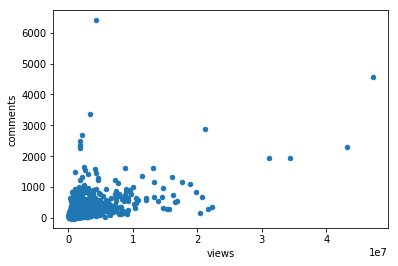

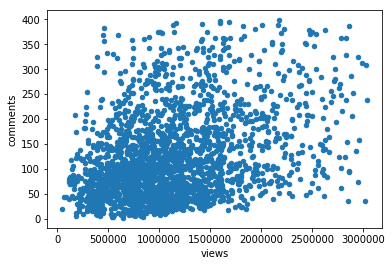

In [17]:
# There doesn't seem to be any correlation between views and comments. The top viewed TED talk is not the top commented 
# inspite of having 10 times more views than the top commented one "Militant Atheism".

display(ted.plot(x = "views", y = "comments", kind = "scatter"))
display(ted[(ted["comments"] < 400) & (ted["views"] < 3050000)].plot(x = "views", y = "comments", kind = "scatter"))
display(ted[(ted["views"] < 500000) & (ted["comments"] > 600)].head())
display(ted[(ted["views"] > 3000000) & (ted["comments"] < 50)].head())

262    28
Name: languages, dtype: int64

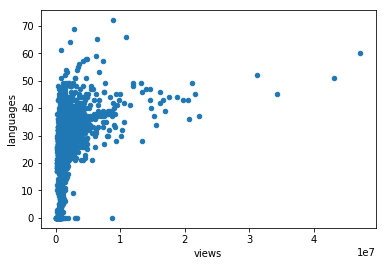

In [18]:
# We observe that views and languages are slightly positively correlated 0.3, TED talks with more than 10 million 
# have atleast 28 languages

ted.plot(x = "views", y = "languages", kind = "scatter")
ted[ted["views"] > 10000000].languages.sort_values().head(1)

In [19]:
# Each rating with the associated score for each talk normalized over the number of views. 

def populate_ratings():
    for index, rating_str in ratings_df["ratings"].iteritems():
        max_rating = -1
        ratings_list = ast.literal_eval(rating_str)
        for rating in ratings_list:
            ratings_df.loc[index, rating["name"]] = rating["count"] / ted.iloc[index]["views"]
populate_ratings()

In [20]:
display_list = ["title", "main_speaker"] + list(ratings_list)
ratings_df[display_list].head()

,title,main_speaker,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
0,Do schools kill creativity?,Ken Robinson,0.000416,0.000097,0.000129,0.000069,0.000008,0.000005,0.000156,0.000224,0.000006,0.000227,0.000094,0.000025,0.000004,0.000528
1,Averting the climate crisis,Al Gore,0.000170,0.000018,0.000017,0.000043,0.000035,0.000019,0.000138,0.000041,0.000081,0.000084,0.000036,0.000063,0.000041,0.000129
2,Simplicity sells,David Pogue,0.000589,0.000037,0.000112,0.000028,0.000048,0.000017,0.000241,0.000101,0.000064,0.000141,0.000033,0.000089,0.000087,0.000141
3,Greening the ghetto,Majora Carter,0.000035,0.000171,0.000062,0.000448,0.000031,0.000019,0.000224,0.000078,0.000021,0.000271,0.000135,0.000050,0.000021,0.000630
4,The best stats you've ever seen,Hans Rosling,0.000116,0.000078,0.000267,0.000026,0.000009,0.000006,0.000453,0.000384,0.000006,0.000212,0.000311,0.000021,0.000005,0.000241


In [21]:
for rating in ratings_list:
    display(ratings_df.sort_values(by = rating, ascending = False)[["title", rating, "views"]].head(5))
    
# This gives us a more accurate description of whether the talk was funny/inspiring etc. This is per user how many 
# people found it funny as opposed to overall coz it may be biased for a talk with more views.

,title,Funny,views
675,"Lies, damned lies and statistics (about TEDTalks)",0.002509,2212944
941,Gotta share!,0.002056,357454
194,Juggle and jest,0.002027,807628
1341,An animated tour of the invisible,0.001962,336430
764,This is broken,0.001696,955329


,title,Beautiful,views
972,Building a park in the sky,0.009493,704205
237,"""Kounandi""",0.004001,82488
1193,The secret life of plankton,0.001933,197120
209,"""M'Bifo""",0.001770,294936
791,A message to gay teens: It gets better,0.001762,278672


,title,Ingenious,views
1324,Brilliant designs to fit more people in every ...,0.001482,1052980
1230,3 new ways to kill mosquitoes,0.001394,264684
1126,What happens inside those massive warehouses?,0.001312,276779
1125,Hedonistic sustainability,0.001236,422460
803,E-voting without fraud,0.001133,543551


,title,Courageous,views
791,A message to gay teens: It gets better,0.004500,278672
1087,What happens when an NGO admits failure,0.002507,221777
1301,When a reporter becomes the story,0.002180,144044
914,"Transplant cells, not organs",0.001830,620231
744,The case for same-sex marriage,0.001717,292395


,title,Longwinded,views
1179,Victims of the city,0.000626,142164
481,17 words of architectural inspiration,0.000570,784642
431,Rethinking the way we sit down,0.000422,554650
947,Authentic creativity vs. karaoke culture,0.000422,251313
1079,Don't misrepresent Africa,0.000371,121186


,title,Confusing,views
494,I believe we evolved from aquatic apes,0.000511,1038576
481,17 words of architectural inspiration,0.000311,784642
1198,"""Put the financial aid in the bag""",0.000306,186308
1106,Be suspicious of simple stories,0.000288,277326
311,An 8-dimensional model of the universe,0.000252,1491698


,title,Informative,views
776,The early birdwatchers,0.001469,112321
2171,Why gun violence can't be our new normal,0.001409,1096198
1087,What happens when an NGO admits failure,0.001326,221777
1212,Just how small is an atom?,0.001318,419672
1111,"Thorium, an alternative nuclear fuel",0.001276,390395


,title,Fascinating,views
1193,The secret life of plankton,0.002039,197120
1173,Deep ocean mysteries and wonders,0.001686,277544
1044,The divided brain,0.001624,648251
1171,The cockroach beatbox,0.001316,303986
1341,An animated tour of the invisible,0.001296,336430


,title,Unconvincing,views
494,I believe we evolved from aquatic apes,0.002113,1038576
1060,6 ways to save the internet,0.001155,287416
481,17 words of architectural inspiration,0.001128,784642
2314,Enough with the fear of fat,0.000780,1594248
464,The world in 2200,0.000761,493966


,title,Persuasive,views
2171,Why gun violence can't be our new normal,0.002759,1096198
744,The case for same-sex marriage,0.002657,292395
128,Aid versus trade,0.002383,524049
1093,My subversive (garden) plot,0.001718,191555
160,A critical look at geoengineering against clim...,0.001542,876658


,title,Jaw-dropping,views
108,How PhotoSynth can connect the world's images,0.003086,4772595
148,This is Saturn,0.001892,2627709
117,New insights on poverty,0.001584,3243784
137,"Luke, a new prosthetic arm for soldiers",0.001320,1575699
16,"Improvising on piano, aged 14",0.001226,1628912


,title,OK,views
1104,"Change our culture, change our world",0.000440,125050
1198,"""Put the financial aid in the bag""",0.000435,186308
1191,Inventing is the easy part. Marketing takes work,0.000432,208115
590,What Bernie Madoff couldn't steal from me,0.000427,149818
1486,How much does a video weigh?,0.000419,195899


,title,Obnoxious,views
481,17 words of architectural inspiration,0.001735,784642
494,I believe we evolved from aquatic apes,0.000993,1038576
817,Protecting the brain against concussion,0.000652,452578
1198,"""Put the financial aid in the bag""",0.000649,186308
941,Gotta share!,0.000610,357454


,title,Inspiring,views
914,"Transplant cells, not organs",0.006747,620231
791,A message to gay teens: It gets better,0.003387,278672
1301,When a reporter becomes the story,0.002923,144044
2171,Why gun violence can't be our new normal,0.002819,1096198
1916,Why we all need to practice emotional first aid,0.002688,4984884


In [22]:
ratings_df[list(ratings_list)].corr()

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
Funny,1.000000,0.021137,0.219400,-0.014976,0.103443,0.141540,0.042082,0.166617,0.059780,0.027065,0.040614,0.254693,0.217127,0.060972
Beautiful,0.021137,1.000000,0.041143,0.203846,0.005912,0.026498,-0.111481,0.184077,-0.027351,-0.026977,0.159512,0.075770,0.017257,0.313445
Ingenious,0.219400,0.041143,1.000000,-0.076649,0.063479,0.138951,0.204949,0.504996,0.062792,0.111915,0.375057,0.144391,0.057970,0.146510
Courageous,-0.014976,0.203846,-0.076649,1.000000,0.029352,0.037211,0.068475,-0.039276,0.076454,0.358521,0.132765,0.027676,0.099149,0.641771
Longwinded,0.103443,0.005912,0.063479,0.029352,1.000000,0.570625,0.229950,0.135708,0.492779,0.204017,0.024601,0.593701,0.470467,0.085221
Confusing,0.141540,0.026498,0.138951,0.037211,0.570625,1.000000,0.180586,0.203047,0.685530,0.146541,0.067215,0.538857,0.583076,0.010656
Informative,0.042082,-0.111481,0.204949,0.068475,0.229950,0.180586,1.000000,0.525218,0.190381,0.567289,0.163203,0.320464,0.069371,0.126041
Fascinating,0.166617,0.184077,0.504996,-0.039276,0.135708,0.203047,0.525218,1.000000,0.072579,0.139275,0.490626,0.205983,0.056272,0.214565
Unconvincing,0.059780,-0.027351,0.062792,0.076454,0.492779,0.685530,0.190381,0.072579,1.000000,0.266378,0.000985,0.496356,0.667337,0.040643
Persuasive,0.027065,-0.026977,0.111915,0.358521,0.204017,0.146541,0.567289,0.139275,0.266378,1.000000,0.096740,0.210690,0.141379,0.427816


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cc6b198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10d6d8f60>]], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d6e4e48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10e774a20>]], dtype=object)

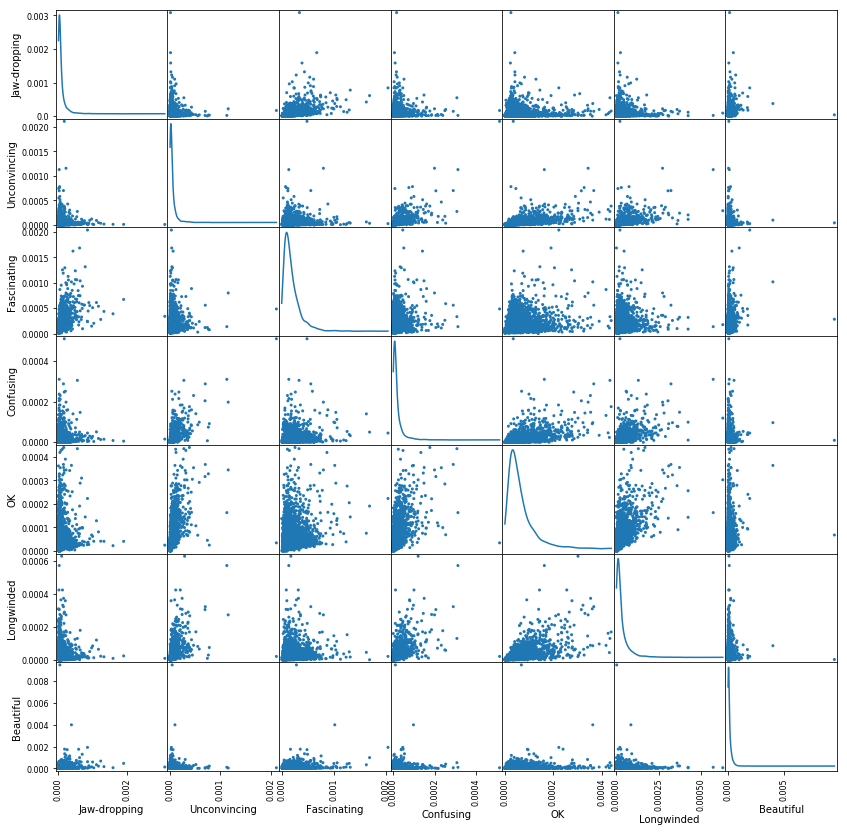

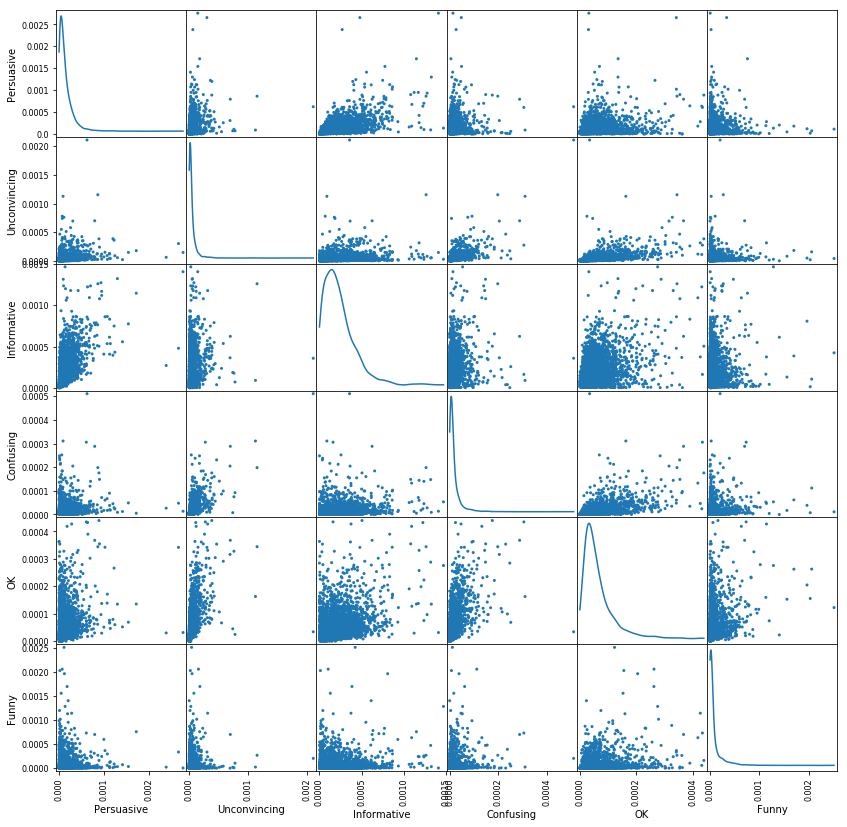

In [23]:
# ratings_df[list(ratings_list)].corr()
# display(ratings_df[["Jaw-dropping", "Unconvincing", "Fascinating", "Confusing", "OK", "Longwinded", "Beautiful"]].corr())
# display(ratings_df[["Persuasive", "Unconvincing", "Informative", "Confusing", "OK", "Funny"]].corr())
positive = ratings_df[["Jaw-dropping", "Unconvincing", "Fascinating", "Confusing", "OK", "Longwinded", "Beautiful"]]
negative = ratings_df[["Persuasive", "Unconvincing", "Informative", "Confusing", "OK", "Funny"]]
display(scatter_matrix(positive, alpha=1, figsize=(14, 14), diagonal='kde'))
display(scatter_matrix(negative, alpha=1, figsize=(14, 14), diagonal='kde'))

# We were expecting positive correlation between some ratings which we were able to verify. 
# Didn't seem to find any negative correlation which was surprising.

In [24]:
# Trends of tags across years
ted["year"] = -1
def populate_years():
    for index, epoch in ted["published_date"].iteritems():
        ted.loc[index, "year"] = datetime.fromtimestamp(epoch).year

populate_years()
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,2006


In [25]:
tag_dict_list = []

for year in ted.year.unique():
    tag_dict = {}
    for index, talk in ted[ted["year"] == year].iterrows():
        tags_list = ast.literal_eval(talk["tags"])
        for tag in tags_list:
            tag_dict[tag] = tag_dict.get(tag, 0) + 1
    tag_dict_list.append(tag_dict)

year_tag_df = pd.DataFrame(tag_dict_list).fillna(0)
year_tag_df = year_tag_df.set_index(ted.year.unique())
year_tag_df

,3d printing,AI,AIDS,Addiction,Africa,Alzheimer's,Anthropocene,Asia,Autism spectrum disorder,Bioethics,...,wikipedia,wind energy,women,women in business,work,work-life balance,world cultures,writing,wunderkind,youth
2006,0.0,0.0,1.0,0.0,3,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1,0.0,1.0,0.0,0.0,0.0,3.0,1.0
2007,0.0,2.0,2.0,0.0,16,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,4,4.0,0.0,1.0,0.0,1.0,0.0,0.0
2008,0.0,1.0,1.0,0.0,17,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,3,0.0,2.0,1.0,1.0,7.0,0.0,0.0
2009,0.0,0.0,2.0,0.0,9,0.0,2.0,9.0,0.0,0.0,...,1.0,1.0,5,1.0,9.0,1.0,1.0,9.0,0.0,0.0
2010,0.0,2.0,4.0,0.0,7,0.0,4.0,1.0,1.0,0.0,...,1.0,1.0,11,3.0,2.0,0.0,0.0,5.0,0.0,0.0
2011,0.0,4.0,0.0,0.0,3,0.0,2.0,3.0,0.0,3.0,...,1.0,0.0,8,1.0,3.0,1.0,0.0,4.0,0.0,3.0
2012,1.0,6.0,2.0,0.0,4,1.0,0.0,4.0,3.0,5.0,...,1.0,4.0,12,3.0,3.0,0.0,4.0,0.0,1.0,12.0
2013,1.0,1.0,1.0,0.0,11,1.0,1.0,4.0,1.0,5.0,...,0.0,0.0,7,2.0,7.0,0.0,2.0,8.0,1.0,9.0
2014,1.0,5.0,0.0,0.0,3,1.0,1.0,0.0,2.0,1.0,...,0.0,0.0,11,4.0,7.0,2.0,1.0,1.0,0.0,5.0
2015,0.0,3.0,1.0,1.0,2,1.0,0.0,1.0,2.0,2.0,...,0.0,0.0,21,3.0,10.0,2.0,1.0,4.0,0.0,7.0


In [26]:
# Filtering out tags

tags_of_interest = []

for i in year_tag_df.columns:
    # Removing tags that contain 'TED'
    if 'TED' not in i:
        tags_of_interest.append(i)

#print(tags_of_interest)

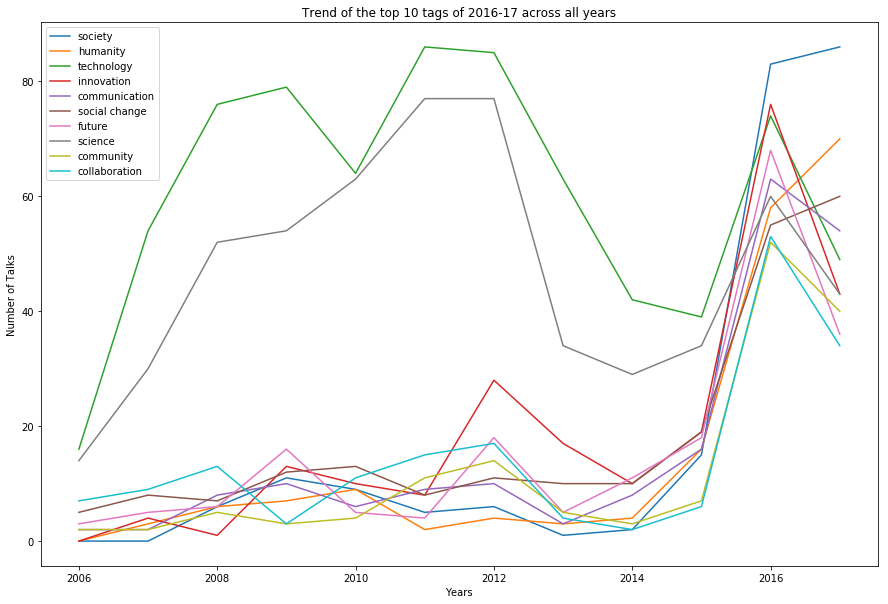

In [27]:
# Top 10 tags of 2016-17
top_tags_1617 = year_tag_df.loc[[2016,2017],tags_of_interest].sum().sort_values(ascending = False)[:10].index

ax = year_tag_df[top_tags_1617].plot(figsize = (15,10), title = 'Trend of the top 10 tags of 2016-17 across all years' )
ax.set_xlabel("Years")
ax.set_ylabel("Number of Talks")
plt.show()

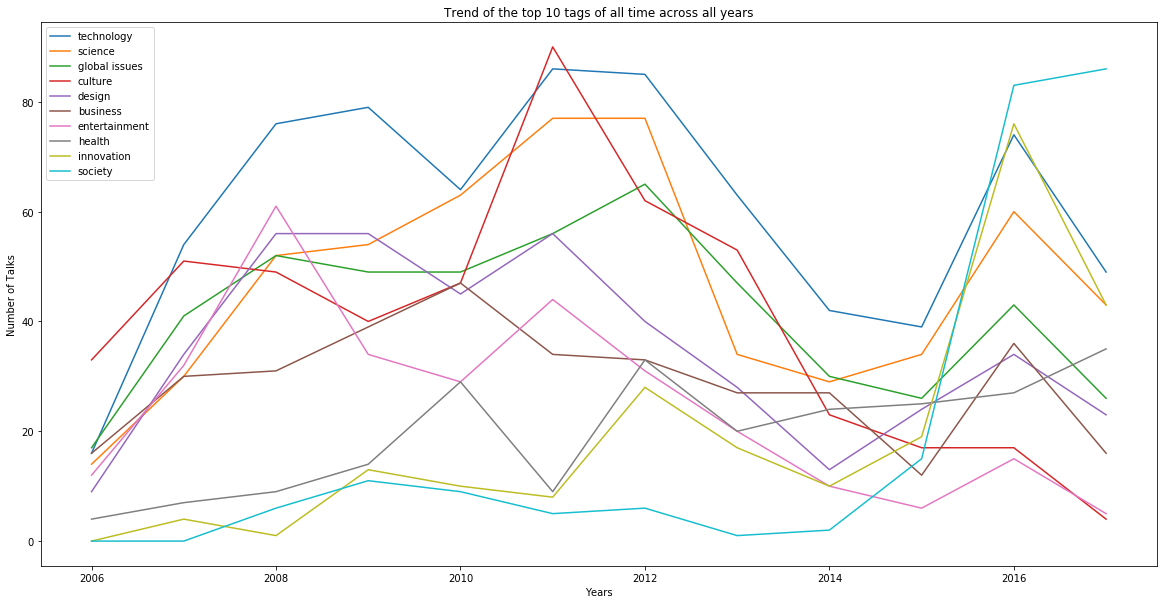

In [28]:
# Top 10 tags of all time
top_tags_alltime = year_tag_df.loc[:,tags_of_interest].sum().sort_values(ascending = False)[:10].index

ax = year_tag_df[top_tags_alltime].plot(figsize = (20,10), title = 'Trend of the top 10 tags of all time across all years' )
ax.set_xlabel("Years")
ax.set_ylabel("Number of Talks")
plt.show()

In [29]:
def make_dtm(lst):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'[a-zA-Z]+') #Only english alphabets
    res = []
    for script in lst:
        d = {}
        d['audience_laughter'] = script.lower().count('(laughter)')
        d['audience_applause'] = script.lower().count('(applause)')
        tokens =  tokenizer.tokenize(script.lower())
        for word in tokens:
            if word in stopWords:
                continue
            d[word] =  d.get(word,0) + 1
        res.append(d)
    return pd.DataFrame(res).fillna(0)

#Creating the document term matrix
dtm = make_dtm(transcript.transcript)
#print(dtm.shape)
dtm_end = dtm.shape[1]

In [30]:
def wordcount(script):
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+') #Only english alphabets
    tokens =  tokenizer.tokenize(script.lower())
    return len(tokens)

#Features to calculate word per minutes
ratings_df['duration_min'] = round(ratings_df.duration / 60)
transcript['words'] = transcript['transcript'].apply(wordcount)
dtm['word_count'] = transcript.words
dtm['url_match'] = transcript.url


#Creating the combined dataframe
full_df = pd.merge(dtm,ratings_df, left_on = 'url_match', right_on = 'url')

In [31]:
#Word per minute calculations
full_df['wpm'] = full_df['word_count'] / full_df['duration_min']
full_df['wpm_category'] = ['Optimal' if (i >= 140 and i <= 175) else 'Fast' if i > 175 else 'Slow' for i in full_df.wpm]
display(full_df[full_df['word_count'] >= 100][['wpm','wpm_category']].describe())
display(full_df.wpm_category.value_counts())

,wpm
count,2457.000000
mean,154.023181
std,30.477090
min,10.823529
25%,138.416667
50%,156.000000
75%,172.800000
max,254.400000


Optimal    1259
Slow        664
Fast        544
Name: wpm_category, dtype: int64

In [32]:
#Cheaking the 0.2 wpm talk and other outliers

transcript.iloc[transcript.words.sort_values()[:15].index,[0,2]]

,transcript,words
1796,(Music)(Applause),2
146,(Applause)(Music)(Applause),3
908,(Music)(Applause)(Music)(Applause),4
1919,(Music)(Music) (Applause)(Applause),4
1365,(Mechanical noises)(Music) (Applause),4
2301,(Guitar music starts)(Cheers)(Cheers)(Music ends),7
1173,(Music)(Applause)(Music)(Applause)(Music)(Appl...,8
2000,(Guitar music starts)(Music ends)(Applause)(Di...,20
304,"Let's just get started here.Okay, just a momen...",21
574,(Music)(Applause)(Music)(Music) (Applause)(Mus...,25


In [33]:
#Checking correlation of wpm with ratings
full_df[['wpm']+list(ratings_list)].corr()

#There is no strong correlation.

,wpm,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
wpm,1.000000,0.044178,-0.177082,0.141818,-0.047729,0.068381,0.059833,0.299061,0.176776,0.031018,0.154011,-0.034510,0.032216,0.000622,0.018721
Funny,0.044178,1.000000,-0.008910,0.162732,-0.058631,0.066610,0.088329,-0.054082,0.073573,0.025008,-0.007242,-0.001018,0.191346,0.140827,-0.010853
Beautiful,-0.177082,-0.008910,1.000000,0.007444,0.142691,-0.022676,-0.023516,-0.174711,0.095437,-0.041922,-0.070168,0.092453,-0.017958,-0.001934,0.248048
Ingenious,0.141818,0.162732,0.007444,1.000000,-0.124056,0.037639,0.094484,0.147667,0.483256,0.038974,0.074676,0.347795,0.083837,0.011488,0.103290
Courageous,-0.047729,-0.058631,0.142691,-0.124056,1.000000,-0.006911,-0.002346,0.034961,-0.086915,0.072816,0.321129,0.081288,-0.075859,0.080155,0.609748
Longwinded,0.068381,0.066610,-0.022676,0.037639,-0.006911,1.000000,0.569974,0.159000,0.105819,0.472894,0.145287,0.000031,0.572544,0.480843,0.024990
Confusing,0.059833,0.088329,-0.023516,0.094484,-0.002346,0.569974,1.000000,0.112424,0.141686,0.696748,0.101021,0.018081,0.483717,0.550453,-0.053310
Informative,0.299061,-0.054082,-0.174711,0.147667,0.034961,0.159000,0.112424,1.000000,0.444330,0.144940,0.569564,0.111542,0.216013,0.038933,0.065001
Fascinating,0.176776,0.073573,0.095437,0.483256,-0.086915,0.105819,0.141686,0.444330,1.000000,0.039385,0.097878,0.464753,0.095774,0.017315,0.174331
Unconvincing,0.031018,0.025008,-0.041922,0.038974,0.072816,0.472894,0.696748,0.144940,0.039385,1.000000,0.219370,-0.021215,0.478962,0.689082,-0.005187


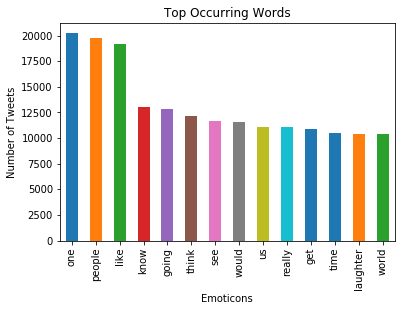

In [34]:
#Top occuring words excluding stop words
ax = dtm.iloc[:,:dtm_end].sum().sort_values(ascending = False)[:14].plot(kind = 'bar', title = 'Top Occurring Words')
ax.set_xlabel("Emoticons")
ax.set_ylabel("Number of Tweets")
plt.show()

In [35]:
#Word per minute analysis
agg_list = {}
for rating in ratings_list:
    agg_list[rating] = 'mean'

display(full_df.groupby(['wpm_category']).agg(agg_list))

,Funny,Beautiful,Ingenious,Courageous,Longwinded,Confusing,Informative,Fascinating,Unconvincing,Persuasive,Jaw-dropping,OK,Obnoxious,Inspiring
wpm_category,,,,,,,,,,,,,,
Fast,0.000086,0.000082,0.000133,0.000076,0.000035,0.000022,0.000273,0.000226,0.000048,0.000150,0.000083,0.000067,0.000025,0.000270
Optimal,0.000070,0.000101,0.000098,0.000102,0.000026,0.000016,0.000234,0.000179,0.000043,0.000145,0.000074,0.000058,0.000020,0.000289
Slow,0.000063,0.000159,0.000075,0.000111,0.000025,0.000015,0.000161,0.000146,0.000041,0.000100,0.000075,0.000058,0.000021,0.000281


In [36]:
#Audience Engagement
def getTopRating(lst):
    res = []
    count = []
    for x in lst:
        res.append(pd.DataFrame(eval(x)).sort_values(by = 'count', ascending = False).name[0])
        count.append(pd.DataFrame(eval(x)).sort_values(by = 'count', ascending = False).iloc[0][0])
    return (res,count)
full_df['top_rating'] , full_df['top_rating_votes'] = getTopRating(full_df.ratings_y)

#Laugther
display(full_df.sort_values(by = 'audience_laughter', ascending = False)[['top_rating','title_y']].head(15))

#Applause
display(full_df.sort_values(by = 'audience_applause', ascending = False)[['top_rating','title_y']].head(15))

,top_rating,title_y
578,OK,All things are Moleeds
21,Funny,Nerdcore comedy
96,Funny,A comic sendup of TED2006
557,Funny,A one-man world summit
416,Funny,A theory of everything
405,Funny,Cool tricks your phone can do
444,Jaw-dropping,10 things you didn't know about orgasm
2033,Funny,This is what happens when you reply to spam email
0,Funny,Do schools kill creativity?
270,Fascinating,Close-up card magic with a twist


,top_rating,title_y
1252,Courageous,A choreographer's creative process in real time
222,Ingenious,Juggling as art ... and science
372,Jaw-dropping,Fiddling in reel time
2394,Inspiring,Doesn't everyone deserve a chance at a good life?
96,Funny,A comic sendup of TED2006
2239,Courageous,It's time for women to run for office
256,Confusing,Brain magic
2,Funny,Simplicity sells
676,Informative,Debate: Does the world need nuclear energy?
165,Fascinating,"A performance of ""Mathemagic"""


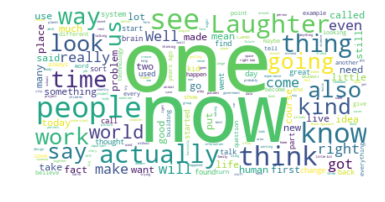

In [37]:
#Word cloud
wordcloud = WordCloud(background_color="white",max_font_size=100).generate(' '.join(transcript.transcript))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()